In [5]:
import numpy as np
from matplotlib import pyplot as plt
import itertools
from qutip import *
from types import SimpleNamespace

In [71]:
from labtools import plot_style

In [72]:
p = plot_style.plotting()

In [45]:
pulse_args = {'delta': 0, 
              'width': 0, 
              'intensity':1, 
              't0':5, 
              'pulse_dt':10,
              'wait_dt': 10,
              'tmin':0,
              'tmax':100,
              'bg':0}
emitter_args = {'omega': 0.2, 
                'gamma': 1/10, 
                'gamma_2':1/20}

In [46]:
pulse = SimpleNamespace(**pulse_args)
emitter = SimpleNamespace(**emitter_args)
g = fock(2,0)
e = fock(2,1)
sm = e*g.dag()
H0 = qeye(2)                       # identity because we are in the interaction picture

## Set up a hamiltonian in interaction picture:
-- JCH

-- interaction picture

-- Lindblad master equations

-- Bloch sphere

In [49]:
H_0 = pulse.delta*sm*sm.dag() + emitter.omega/2 * (sm + sm.dag())

H = [H_0]          # complete system Hamiltonian
c_ops = [np.sqrt(emitter.gamma) * g*e.dag(), np.sqrt(emitter.gamma_2) * e*e.dag()]    # lowering operator for channel 1#, np.sqrt(gamma_2) * e*e.dag()
e_ops = [e*e.dag(), g*g.dag(), sigmax(), sigmay(), sigmaz()] #\
tlist = np.linspace(pulse.tmin, pulse.tmax, 200)
result = mesolve(H, g, tlist, c_ops, e_ops)

In [77]:
import matplotlib

In [78]:
matplotlib.rcParams['font.family'] = "Arial"

(<Figure size 1000x600 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f805aa53c50>)

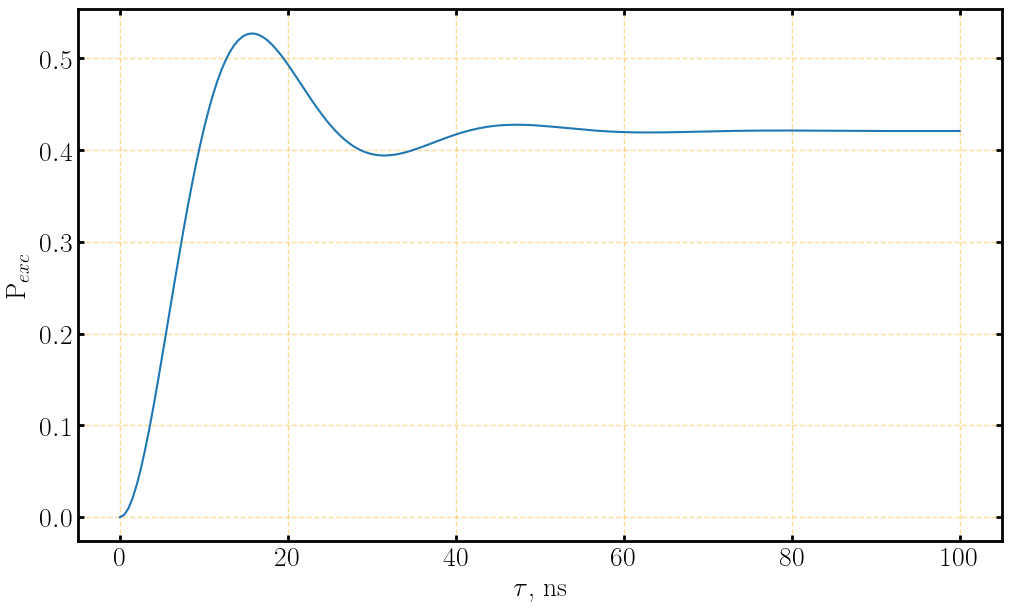

In [79]:
p.plot(tlist, result.expect[0], xLabel=r"$\tau$, ns", yLabel=r"P$_{exc}$",line='-')

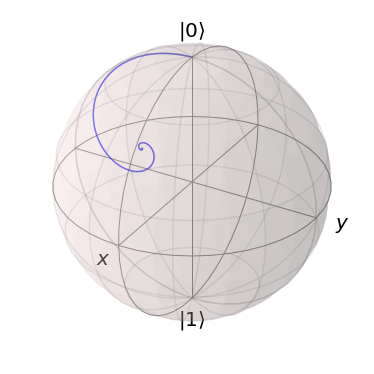

In [51]:
b = Bloch()
b.add_points(result.expect[2:], meth='l')
b.make_sphere()
plt.savefig('bloch.png')

## Correlation
-- correlation function

-- spectrum

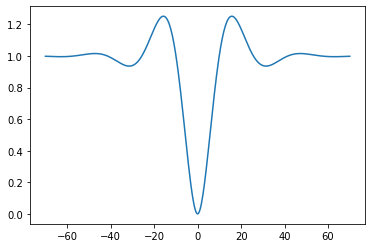

In [52]:
taus = np.linspace(0, 70.0, 200)
states = [{'state': g, 'label': "Ground state"}]
tausP = np.linspace(0, 255.0, 200)
# first calculate the occupation number as a function of time
pop_e = mesolve(H_0, g, taus, c_ops, [e*e.dag()]).expect[0]
pop_eInf = mesolve(H_0, g, tausP, c_ops, [e*e.dag()]).expect[0][-1]
g2 = pop_e/pop_eInf
g2_f = np.real(np.flip(g2))
g2 = np.concatenate((g2_f, g2))
tauS = np.concatenate((-np.flip(taus), taus))

plt.plot(tauS, g2)


-- Quantum regression theorem

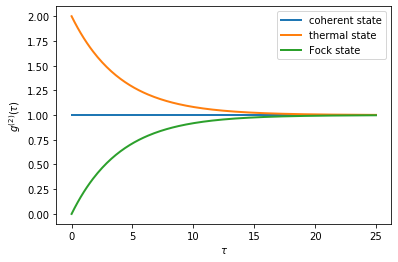

In [70]:
N = 25
taus = np.linspace(0, 25.0, 200)
a = destroy(N)
H = 2 * np.pi * a.dag() * a

kappa = 0.25
n_th = 1  # bath temperature in terms of excitation number
c_ops = [np.sqrt(kappa * (1 + n_th)) * a, np.sqrt(kappa * n_th) * a.dag()]

states = [{'state': coherent_dm(N, np.sqrt(2)), 'label': "coherent state"},
          {'state': thermal_dm(N, 1), 'label': "thermal state"},
          {'state': fock_dm(N, 1), 'label': "Fock state"}]

fig, ax = plt.subplots(1, 1)

for state in states:
    rho0 = state['state']

    # first calculate the occupation number as a function of time
    n = mesolve(H, rho0, taus, c_ops, [a.dag() * a]).expect[0]

    # calculate the correlation function G2 and normalize with n(0)n(t) to
    # obtain g2
    G2 = correlation_4op_1t(H, rho0, taus, c_ops, a.dag(), a.dag(), a, a)
    g2 = G2 / (n[0] * n)

    ax.plot(taus, np.real(g2), label=state['label'], lw=2)

ax.legend(loc=0)
ax.set_xlabel(r'$\tau$')
ax.set_ylabel(r'$g^{(2)}(\tau)$')
plt.show()